In [2]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [3]:
import sys
sys.path.insert(0, jaxqualin_path)

In [4]:
import jaxqualin.postprocess
import jaxqualin.plot
import jaxqualin.qnmode

from jaxqualin.postprocess import *
from jaxqualin.plot import *
from jaxqualin.qnmode import *

2023-10-01 16:50:41.101147: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-10-01 16:50:41.279051: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-10-01 16:50:41.293633: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [5]:
from importlib import reload

In [6]:
reload(jaxqualin.postprocess)
from jaxqualin.postprocess import *
reload(jaxqualin.plot)
from jaxqualin.plot import *
reload(jaxqualin.qnmode) 
from jaxqualin.qnmode import *

In [7]:
# from pmlb import fetch_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np


In [8]:
import sys
import os

In [9]:
os.environ["PATH"] = "/home/mcheung1/julia-1.9.0/bin"+ os.pathsep + os.environ["PATH"]

In [28]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [11]:
settingname = "normal2"

ROOT_PATH = jaxqualin_path
PLOT_PATH = os.path.join(ROOT_PATH, f"plots/{settingname}/")
PLOT_PATH_ROOT = os.path.join(ROOT_PATH, f"plots/")

In [12]:
runname = "normal2_prodB1"
runname_validation = "normal2_prodB3"

df = pd.read_csv(f"../../pickle/data_frame/{runname}_physical.csv")
df = classify_modes(df)
df = df_change_retro_to_pro(df)

In [13]:
df_validation = pd.read_csv(f"../../pickle/data_frame/{runname_validation}_physical.csv")
df_validation = classify_modes(df_validation)
df_validation = df_change_retro_to_pro(df_validation)

In [14]:
df_full = pd.concat([df, df_validation])

In [15]:
def adjust_phi(row, df):
    phi_med = row['phi_med']
    SXS_num = row['SXS_num']
    retro = row['retro']
    mode_string = row['mode_string']
    if mode_string == 'constant':
        return phi_med
    m = int(mode_string.split('.')[1])
    row_220 = df[(df['SXS_num'] == SXS_num)&(df['l'] == 2)&(df['m'] == 2)&(df['mode_string'] == '2.2.0')]
    phi_220 = row_220['phi_med'].values[0]
    retro_fac = -1 if retro else 1
    return 2*phi_med - phi_220*np.abs(m)

In [16]:
phi_med_adj_col_full = df_full.apply(lambda row: adjust_phi(row, df_full), axis=1)
df_full['phi_med_adj'] = phi_med_adj_col_full % (2*np.pi)

In [17]:
phi_med_adj_col = df.apply(lambda row: adjust_phi(row, df), axis=1)
df['phi_med_adj'] = phi_med_adj_col % (2*np.pi)

In [18]:
# PN_dom_func = {
#     (2,2): lambda eta: eta,
#     (2,1): lambda eta: eta*np.sqrt(1 - 4*eta),
#     (3,3): lambda eta: eta*np.sqrt(1 - 4*eta),
#     (3,2): lambda eta: eta*(1 - 3*eta),
#     (3,1): lambda eta: eta*np.sqrt(1 - 4*eta),
#     (4,4): lambda eta: eta*(1 - 3*eta),
#     (4,3): lambda eta: eta*np.sqrt(1 - 4*eta)*(1 - 2*eta),
#     (4,2): lambda eta: eta*(1 - 3*eta),
#     (4,1): lambda eta: eta*np.sqrt(1 - 4*eta)*(1 - 2*eta),
#     (5,5): lambda eta: eta*np.sqrt(1 - 4*eta)*(1 - 2*eta),
#     (6,6): lambda eta: eta*(1 - 5*eta + 5*eta**2),
#     (7,7): lambda eta: eta*np.sqrt(1 - 4*eta)*(1 - 4*eta + 3*eta**2),
#     (8,8): lambda eta: eta*(1 - 7*eta + 14*eta**2 - 7*eta**3),
# }

# dom_func_tex_string = {
#     (2,2): r"$\eta$",
#     (2,1): r"$\eta\sqrt{1 - 4\eta}$",
#     (3,3): r"$\eta\sqrt{1 - 4\eta}$",
#     (3,2): r"$\eta(1 - 3\eta)$",
#     (3,1): r"$\eta\sqrt{1 - 4\eta}$",
#     (4,4): r"$\eta(1 - 3\eta)$",
#     (4,3): r"$\eta\sqrt{1 - 4\eta}(1 - 2\eta)$",
#     (4,2): r"$\eta(1 - 3\eta)$",
#     (4,1): r"$\eta\sqrt{1 - 4\eta}(1 - 2\eta)$",
#     (5,5): r"$\eta\sqrt{1 - 4\eta}(1 - 2\eta)$",
#     (6,6): r"$\eta(1 - 5\eta + 5\eta^2)$",
#     (7,7): r"$\eta\sqrt{1 - 4\eta}(1 - 4\eta + 3\eta^2)$",
#     (8,8): r"$\eta(1 - 7\eta + 14\eta^2 - 7\eta^3)$",
# }

all_lm = [(2,2),(2,1),(3,3),(3,2),(3,1),(4,4),(4,3),(4,2),(4,1),(5,5),(6,6),(7,7),(8,8)]
zero_at_equal_mass_ratio = [(2,1),(3,3),(3,1),(4,3),(4,1),(5,5),(7,7)]

PN_dom_func = {}

for lm in all_lm:
    if lm in zero_at_equal_mass_ratio:
        PN_dom_func[lm] = lambda eta: eta*np.sqrt(1 - 4*eta)
    else:
        PN_dom_func[lm] = lambda eta: eta

In [1169]:
l, m = 3, 3
mode_string_pro = '3.3.1'
mode_string_plot = mode_string_pro.replace('.', ',')
mode_string_plot_tex = mode_string_pro.replace('.', r'{,}')
if mode_string_plot[0] == '-':
    mode_string_plot = '𝑟' + mode_string_plot[1:]
    mode_string_plot_tex = r'r' + mode_string_plot_tex[1:]
    PN_func = PN_dom_func[(l,m)]
else:
    PN_func = PN_dom_func[(l,m)]

# screen = [1110]
if mode_string_pro == '5.5.0':
    screen = [110, 40]
else:
    screen = []
df_mode_3D = df_get_mode_3D_full(df, l, m, mode_string_pro, SXS_screen = screen, chi_low = 0.1, include_retro = False)
df_mode_3D = df_mode_3D.dropna()
# df_mode_3D = df_mode_3D[df_mode_3D['SXS_num'] > 305]
df_mode_3D['A_med_adj'] = df_mode_3D['A_med'] / PN_func(df_mode_3D['eta'])
df_mode_3D['A_med_log'] = np.log10(df_mode_3D['A_med'])
df_mode_3D['A_comp'] = df_mode_3D['A_med_adj'] #* np.exp(1j*df_mode_3D['phi_med_adj'])
df_mode_3D['A_comp_unadj'] = df_mode_3D['A_med'] #* np.exp(1j*df_mode_3D['phi_med_adj'])
df_mode_3D['A_real'] = np.real(df_mode_3D['A_comp'])
df_mode_3D['A_imag'] = np.imag(df_mode_3D['A_comp'])
df_mode_3D['A_range'] = np.abs(df_mode_3D['A_hi'] - df_mode_3D['A_low'])/df_mode_3D['A_med']
df_mode_3D['A_range_inv'] = 1/df_mode_3D['A_range']
df_mode_3D['A_range_adj_inv'] = PN_func(df_mode_3D['eta'])*df_mode_3D['A_range_inv']
df_mode_3D['A_range_rel_inv'] = df_mode_3D['A_med']*df_mode_3D['A_range_inv']
df_mode_3D['phi_range'] = np.abs(df_mode_3D['phi_hi'] - df_mode_3D['phi_low'])
df_mode_3D['phi_range_inv'] = 1/df_mode_3D['phi_range']
df_mode_3D['A_range_adj_abs'] = np.sqrt((np.abs(df_mode_3D['A_hi'] - df_mode_3D['A_low']))**2 + (df_mode_3D['A_med']*(df_mode_3D['phi_hi'] - df_mode_3D['phi_low']))**2) / PN_func(df_mode_3D['eta']) /2
df_mode_3D['A_range_adj_abs_inv'] = 1/df_mode_3D['A_range_adj_abs']
df_mode_3D['A_range_adj_abs_rel_inv'] = df_mode_3D['A_med_adj']*df_mode_3D['A_range_adj_abs_inv']
df_mode_3D['A_range_abs'] = df_mode_3D['A_range_adj_abs'] * PN_func(df_mode_3D['eta'])
df_mode_3D['A_range_abs_inv'] = 1/df_mode_3D['A_range_abs']

In [1170]:
df_mode_3D_full = df_get_mode_3D_full(df_full, l, m, mode_string_pro, SXS_screen = screen, chi_low = 0.1, include_retro = False)
df_mode_3D_full = df_mode_3D_full.dropna()
df_mode_3D_full['A_med_adj'] = df_mode_3D_full['A_med'] / PN_func(df_mode_3D_full['eta'])
df_mode_3D_full['A_med_log'] = np.log10(df_mode_3D_full['A_med'])
df_mode_3D_full['A_comp'] = df_mode_3D_full['A_med_adj'] * np.exp(1j*df_mode_3D_full['phi_med_adj'])
df_mode_3D_full['A_comp_unadj'] = df_mode_3D_full['A_med'] * np.exp(1j*df_mode_3D_full['phi_med_adj'])
df_mode_3D_full['A_real'] = np.real(df_mode_3D_full['A_comp'])
df_mode_3D_full['A_imag'] = np.imag(df_mode_3D_full['A_comp'])
df_mode_3D_full['A_range'] = np.abs(df_mode_3D_full['A_hi'] - df_mode_3D_full['A_low'])/df_mode_3D_full['A_med']
df_mode_3D_full['A_range_inv'] = 1/df_mode_3D_full['A_range']
df_mode_3D_full['A_range_adj_inv'] = PN_func(df_mode_3D_full['eta'])*df_mode_3D_full['A_range_inv']
df_mode_3D_full['A_range_rel_inv'] = df_mode_3D_full['A_med']*df_mode_3D_full['A_range_inv']
df_mode_3D_full['phi_range'] = np.abs(df_mode_3D_full['phi_hi'] - df_mode_3D_full['phi_low'])
df_mode_3D_full['phi_range_inv'] = 1/df_mode_3D_full['phi_range']
df_mode_3D_full['A_range_adj_abs'] = np.sqrt((np.abs(df_mode_3D_full['A_hi'] - df_mode_3D_full['A_low']))**2 + (df_mode_3D_full['A_med']*(df_mode_3D_full['phi_hi'] - df_mode_3D_full['phi_low']))**2) / PN_func(df_mode_3D_full['eta']) /2
df_mode_3D_full['A_range_adj_abs_inv'] = 1/df_mode_3D_full['A_range_adj_abs']
df_mode_3D_full['A_range_adj_abs_rel_inv'] = df_mode_3D_full['A_med_adj']*df_mode_3D_full['A_range_adj_abs_inv']
df_mode_3D_full['A_range_abs'] = df_mode_3D_full['A_range_adj_abs'] * PN_func(df_mode_3D_full['eta'])
df_mode_3D_full['A_range_abs_inv'] = 1/df_mode_3D_full['A_range_abs']


df_mode_3D_full_full = df_mode_3D_full.copy()
df_mode_3D_full = df_mode_3D_full[
    (~((df_mode_3D_full['SXS_num'] >= 209) & (df_mode_3D_full['SXS_num'] <= 305))) & 
    (~((df_mode_3D_full['SXS_num'] >= 1419) & (df_mode_3D_full['SXS_num'] <= 1509)))]

In [1171]:
equal_mass_ratio_tol = 0.24

if (l,m) in zero_at_equal_mass_ratio:
    df_mode_3D = df_mode_3D[df_mode_3D['eta'] < equal_mass_ratio_tol]
    df_mode_3D_full = df_mode_3D_full[df_mode_3D_full['eta'] < equal_mass_ratio_tol]
# if mode_string_pro == '4.4.0':
#     df_mode_3D = df_mode_3D[df_mode_3D['eta'] < 0.225]
#     df_mode_3D_full = df_mode_3D_full[df_mode_3D_full['eta'] < 0.225]

In [1172]:
df_mode_3D_full.sort_values('A_med')[-10:]

,SXS_num,chi_p,chi_m,eta,chi_1_z,chi_2_z,q,A_med,A_low,A_hi,...,A_range_inv,A_range_adj_inv,A_range_rel_inv,phi_range,phi_range_inv,A_range_adj_abs,A_range_adj_abs_inv,A_range_adj_abs_rel_inv,A_range_abs,A_range_abs_inv
10571,2161,0.449970,0.449967,0.187496,0.599951,6.348448e-06,3.000142,2.346643,2.272375,2.379038,...,22.000642,2.062585,51.627642,0.148941,6.714066,1.948908,0.513108,12.843377,0.182712,5.473086
10619,2162,0.550061,0.350019,0.187498,0.600050,4.000902e-01,3.000073,2.543331,2.471438,2.579298,...,23.579909,2.210630,59.971510,0.115770,8.637810,1.672393,0.597946,16.221484,0.156788,6.378047
10660,2163,0.599934,0.299933,0.187498,0.599908,6.000110e-01,3.000059,2.637090,2.552849,2.676972,...,21.245815,1.991805,56.027119,0.067124,14.897759,1.153030,0.867280,24.395574,0.108097,9.250946
1768,204,0.349891,0.349891,0.109361,0.399867,-6.864840e-07,7.001168,2.675349,2.372526,2.840554,...,5.716221,0.468873,15.292888,0.040251,24.844010,2.927500,0.341588,11.141341,0.240128,4.164444
5623,1150,0.674995,0.375039,0.187507,0.700035,5.998807e-01,2.999789,3.165173,3.120853,3.199643,...,40.172090,3.766067,127.151611,0.027417,36.473808,0.625140,1.599642,54.007818,0.058606,17.063149
5699,1152,0.675087,0.375116,0.187508,0.700149,5.999051e-01,2.999759,3.234576,3.214610,3.250149,...,91.015944,8.532574,294.397985,0.031590,31.655608,0.576993,1.733123,59.797672,0.054092,18.487020
5657,1151,0.675085,0.375114,0.187507,0.700146,5.999090e-01,2.999773,3.254298,3.232388,3.270230,...,85.998903,8.062245,279.866025,0.030758,32.511588,0.570734,1.752130,60.821960,0.053505,18.689735
2601,333,0.800016,0.266709,0.222234,0.800086,7.998765e-01,1.999687,3.385751,3.305034,3.434682,...,26.114866,1.934132,88.418435,0.035094,28.494663,1.187246,0.842285,38.504892,0.087930,11.372629
9285,2131,0.849857,0.283281,0.222228,0.849874,8.498224e-01,1.999854,3.534616,3.505024,3.551624,...,75.850516,5.618146,268.102481,0.052987,18.872657,1.302832,0.767559,36.628533,0.096499,10.362803
7355,2014,0.720102,0.560117,0.160002,0.800140,3.999558e-01,3.999930,4.136851,4.101170,4.180029,...,52.458434,5.036016,217.012750,0.075945,13.167507,1.687067,0.592745,25.542645,0.161959,6.174417


In [1173]:
def phase_push(phase, theta):
    return (phase + theta)%(2*np.pi)

In [1174]:
def unwrap_crude(df, eta_cut, theta, thresh = np.pi, up = True, SXS_minus = [], SXS_plus = []):
    phase_pushed = phase_push(df['phi_med_adj'], theta)
    if up:
        phase_pushed[(df['eta'] < eta_cut) & (phase_pushed < thresh)] += 2*np.pi 
        # phase_pushed[(eta > eta_cut) & (phase_pushed > np.pi)] -= 2*np.pi
    else:
        # phase_pushed[(eta > eta_cut) & (phase_pushed < np.pi)] += 2*np.pi 
        phase_pushed[(df['eta'] < eta_cut) & (phase_pushed > thresh)] -= 2*np.pi
    for SXS_num in SXS_minus:
        if SXS_num in df['SXS_num'].values:
            print(SXS_num)
            phase_pushed[df['SXS_num'] == SXS_num] -= 2*np.pi
    for SXS_num in SXS_plus:
        if SXS_num in df['SXS_num'].values:
            phase_pushed[df['SXS_num'] == SXS_num] += 2*np.pi
    return phase_pushed - theta

In [1175]:
push_dict = {'3.2.0': (0.2, np.pi/2-0.43, np.pi, False, [1468, 2131, 1459], []),
             '4.4.0': (0., -0.9, np.pi, False, [1122, 156], []),
             '5.5.0': (0., -0.5, np.pi, False, [], []),
             '-2.2.0': (0.17, -2.3, np.pi, True, [], []),
             '-2.1.0': (0.17, -2.8, 1, True, [], [1441, 1426])}

In [1176]:
df_mode_3D_full_full['phase_pushed'] = phase_push(df_mode_3D_full_full['phi_med_adj'], -2.4)
if mode_string_pro in push_dict.keys():
    eta_cut, theta, thresh, up, SXS_minus, SXS_plus = push_dict[mode_string_pro]
    df_mode_3D_full_full['phase_unwrapped'] = unwrap_crude(df_mode_3D_full_full, eta_cut, theta, thresh, up, SXS_minus, SXS_plus)
    df_mode_3D['phase_unwrapped'] = unwrap_crude(df_mode_3D, eta_cut, theta, thresh, up, SXS_minus, SXS_plus)
    df_mode_3D_full['phase_unwrapped'] = unwrap_crude(df_mode_3D_full, eta_cut, theta, thresh, up, SXS_minus, SXS_plus)
else:
    df_mode_3D_full_full['phase_unwrapped'] = df_mode_3D_full_full['phi_med_adj']
    df_mode_3D['phase_unwrapped'] = df_mode_3D['phi_med_adj']
    df_mode_3D_full['phase_unwrapped'] = df_mode_3D_full['phi_med_adj']
import plotly.express as px
fig = px.scatter_3d(df_mode_3D_full_full, x='chi_p', y='chi_m', z='eta', color='phase_unwrapped', opacity=0.5, color_continuous_scale='viridis',
                    hover_name = 'SXS_num')
# fig = px.scatter_3d(df_mode_3D_full, x='chi_p', y='chi_m', z='eta', color='phase_pushed', opacity=0.5, color_continuous_scale='viridis')
fig.show()

In [1177]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

row_r = 1/3.5

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{'type': 'scene', 'colspan': 3}, None, None],
           [{'type': 'xy'}, {'type': 'xy'}, {'type': 'xy'}], ],
    row_heights = [1-row_r, row_r],
    vertical_spacing= 0.05,
    horizontal_spacing= 0.07,
    # column_widths = 800,
    # row_heights = 800
    )


df_plot = df_mode_3D_full_full

chi_p = df_plot['chi_p']
chi_m = df_plot['chi_m']
eta = df_plot['eta']
range_invs = ['A_range_inv', 'phi_range_inv', 'A_range_inv']

colorscales = ['Viridis', 'Viridis', 'inferno']
color_vars = ['A_med', 'phase_unwrapped', 't_flat_start']
color_bar_labels = [f'𝐴<sub>{mode_string_plot}</sub>', f'𝜙<sub>{mode_string_plot}</sub>', f'𝑡<sub>start</sub>/𝑀']
button_labels = [f'𝐴<sub>{mode_string_plot}</sub>', f'𝜙<sub>{mode_string_plot}</sub>', f'𝑡<sub>start</sub>']
visibles = [True] + (len(button_labels)-1)*[False]

for iii, color_var in enumerate(color_vars):

    fig1 = go.Scatter3d(x = chi_p, y = chi_m, z = eta, mode = 'markers',
                        marker = dict(size = df_plot[range_invs[iii]]**(1/3), sizeref = max(df_plot[range_invs[iii]])**(1/3)/32.5, 
                        color = df_plot[color_var], colorscale = colorscales[iii], showscale = True,
                        colorbar_x = 0.89,
                        colorbar_y = 2.6/4,
                        colorbar_len = 2.25/4,
                        colorbar_title = color_bar_labels[iii],
                        colorbar_titlefont = dict(size = 30)
                        ),
                        showlegend = False,
                        customdata = np.stack((df_plot['SXS_num'], df_plot['A_med'],
                                            df_plot['phase_unwrapped'], df_plot['A_range'], df_plot['phi_range'],
                                            df_plot['t_flat_start']), axis = -1),
                        hovertemplate = r'SXS:BBH:%{customdata[0]:04}<br>'
                                        r'<br>'
                                        r'𝐴: %{customdata[1]:.4e}<br>'
                                        r'𝜙: %{customdata[2]:.4f}<br>'
                                        r'𝛿𝐴: %{customdata[3]:.4e}<br>'
                                        r'𝛿𝜙 %{customdata[4]:.4e}<br>'
                                        r'𝑡<sub>start</sub>: %{customdata[5]:.1f} 𝑀<br>'
                                        r'<br>'
                                        r'𝜂: %{z:.4f}<br>'
                                        r'𝜒<sub>+</sub>: %{x:.4f}<br>'
                                        r'𝜒<sub>-</sub>: %{y:.4f}<extra></extra>',
                        visible = visibles[iii],
                        )

    small_marker_dict = dict(size = df_plot[range_invs[iii]]**(1/3), sizeref = max(df_plot[range_invs[iii]])**(1/3)/20.0,
                             color = df_plot[color_var], colorscale = colorscales[iii])

    fig2 = go.Scatter(x = chi_p, y = chi_m, mode = 'markers',
                        marker = small_marker_dict,
                        customdata = np.stack((df_plot['SXS_num'], df_plot['A_med'],
                                            df_plot['phase_unwrapped'], df_plot['A_range'], df_plot['phi_range'],
                                            df_plot['eta'], df_plot['t_flat_start']), axis = -1),
                        hovertemplate = r'SXS:BBH:%{customdata[0]:04}<br>'
                                        r'<br>'
                                        r'𝐴: %{customdata[1]:.4e}<br>'
                                        r'𝜙: %{customdata[2]:.4f}<br>'
                                        r'𝛿𝐴: %{customdata[3]:.4e}<br>'
                                        r'𝛿𝜙: %{customdata[4]:.4e}<br>'
                                        r'𝑡<sub>start</sub>: %{customdata[6]:.1f} 𝑀<br>'
                                        r'<br>'
                                        r'𝜂: %{customdata[5]:.4f}<br>'
                                        r'𝜒<sub>+</sub>: %{x:.4f}<br>'
                                        r'𝜒<sub>-</sub>: %{y:.4f}<extra></extra>',
                        visible = visibles[iii],
                        showlegend = False)

    fig3 = go.Scatter(x = chi_p, y = eta, mode = 'markers',
                        marker = small_marker_dict,
                        customdata = np.stack((df_plot['SXS_num'], df_plot['A_med'],
                                                df_plot['phase_unwrapped'], df_plot['A_range'], df_plot['phi_range'],
                                                df_plot['chi_m'], df_plot['t_flat_start']), axis = -1),
                        hovertemplate = r'SXS:BBH:%{customdata[0]:04}<br>'
                                        r'<br>'
                                        r'𝐴: %{customdata[1]:.4e}<br>'
                                        r'𝜙: %{customdata[2]:.4f}<br>'
                                        r'𝛿𝐴: %{customdata[3]:.4e}<br>'
                                        r'𝛿𝜙: %{customdata[4]:.4e}<br>'
                                        r'𝑡<sub>start</sub>: %{customdata[6]:.1f} 𝑀<br>'
                                        r'<br>'
                                        r'𝜂: %{y:.4f}<br>'
                                        r'𝜒<sub>+</sub>: %{x:.4f}<br>'
                                        r'𝜒<sub>-</sub>: %{customdata[5]:.4f}<extra></extra>',
                        visible = visibles[iii],
                        showlegend = False)

    fig4 = go.Scatter(x = chi_m, y = eta, mode = 'markers',
                        marker = small_marker_dict,
                        customdata = np.stack((df_plot['SXS_num'], df_plot['A_med'],
                                                df_plot['phase_unwrapped'], df_plot['A_range'], df_plot['phi_range'],
                                                df_plot['chi_p'], df_plot['t_flat_start']), axis = -1),
                        hovertemplate = r'SXS:BBH:%{customdata[0]:04}<br>'
                                        r'<br>'
                                        r'𝐴: %{customdata[1]:.4e}<br>'
                                        r'𝜙: %{customdata[2]:.4f}<br>'
                                        r'𝛿𝐴: %{customdata[3]:.4e}<br>'
                                        r'𝛿𝜙: %{customdata[4]:.4e}<br>'
                                        r'𝑡<sub>start</sub>: %{customdata[6]:.1f} 𝑀<br>'
                                        r'<br>'
                                        r'𝜂: %{y:.4f}<br>'
                                        r'𝜒<sub>+</sub>: %{customdata[5]:.4f}<br>'
                                        r'𝜒<sub>-</sub>: %{x:.4f}<extra></extra>',
                        visible = visibles[iii],
                        showlegend = False)

    fig.add_trace(fig1, row = 1, col = 1)
    fig.add_trace(fig2, row = 2, col = 1)
    fig.add_trace(fig3, row = 2, col = 2)
    fig.add_trace(fig4, row = 2, col = 3)

fig.update_layout(
        margin = dict(l=0, r=0, t=0, b=0),
        width = 1000, height = 1000,
        # coloraxis_colorbar_y = 0.5
        )

fig.update_layout(
        scene = dict(
            xaxis = dict(title = r'𝜒<sub>+</sub>', titlefont = dict(size=30),
                         tick0 = -0.8, dtick = 0.2,
                         range = [-1.0, 1.0]),
            yaxis = dict(title = r'𝜒<sub>-</sub>', titlefont = dict(size=30),
                         tick0 = -0.8, dtick = 0.2,
                         range = [-1.0, 1.0]),
            zaxis = dict(title = r'𝜂', titlefont = dict(size=30),
                        tick0 = 0.1, dtick = 0.025, 
                        range = [0.09, 0.26]),
                    ),
        font_family = 'Geneva',
        xaxis1 = dict(title = r'𝜒<sub>+</sub>', titlefont = dict(size=20),
                      tick0 = -0.8, dtick = 0.2,
                         range = [-1.0, 1.0]),
        yaxis1 = dict(title = r'𝜒<sub>-</sub>', titlefont = dict(size=20),
                      tick0 = -0.8, dtick = 0.2,
                         range = [-1.0, 1.0]),
        xaxis2 = dict(title = r'𝜒<sub>+</sub>', titlefont = dict(size=20),
                      tick0 = -0.8, dtick = 0.2,
                            range = [-1.0, 1.0]),
        yaxis2 = dict(title = r'𝜂', titlefont = dict(size=20),
                      tick0 = 0.1, dtick = 0.025,
                            range = [0.09, 0.26],
                        title_standoff = 0),
        xaxis3 = dict(title = r'𝜒<sub>-</sub>', titlefont = dict(size=20),
                        tick0 = -0.8, dtick = 0.2,
                        range = [-1.0, 1.0]),
        yaxis3 = dict(title = r'𝜂', titlefont = dict(size = 20),
                      tick0 = 0.1, dtick = 0.025,
                            range = [0.09, 0.26],
                            title_standoff = 0),)

zoomout = 1.2

camera = dict(
    eye = dict(x = 0.5*zoomout, y = -1.5*zoomout, z = 0.5*zoomout),
    center = dict(x = 0.1, y = 0, z = -0.1),
              )

fig.update_layout(scene_camera = camera)

config = {
  'toImageButtonOptions': {
    'format': 'jpeg', # one of png, svg, jpeg, webp
    # 'filename': 'custom_image',
    'scale': 15 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

buttons = []
for i, button_label in enumerate(button_labels):
    button_dict = dict(
        label = button_label,
        method = 'update',
        args = [{"visible": [0 <= j/4 - i < 1 for j in range(4*len(button_labels))]}],
    )
    buttons.append(button_dict)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            font = dict(size = 24),
            borderwidth = 2,
            x=0.01,
            y=0.99,
            buttons=buttons,
            xanchor="left",
            yanchor="top",
            showactive=True,
            active = 0,
        )
    ]
)


fig.show(config = config)

# fig.write_html(f'../../docs/mode_plots/plotly_{mode_string_pro}.html', full_html=False, include_plotlyjs='cdn')


In [1178]:
X_A = df_mode_3D[['eta', 'chi_p', 'chi_m']].to_numpy()
y_A = df_mode_3D['A_med_adj'].to_numpy()
w_A = df_mode_3D['A_range_adj_inv'].to_numpy()**2
w_A = w_A/np.sum(w_A)
X_phi = df_mode_3D[['eta', 'chi_p', 'chi_m']].to_numpy()
y_phi = df_mode_3D['phase_unwrapped'].to_numpy()
w_phi = df_mode_3D['phi_range_inv'].to_numpy()**2
w_phi = w_phi/np.sum(w_phi)

In [1179]:
X_full_A = df_mode_3D_full[['eta', 'chi_p', 'chi_m']].to_numpy()
y_full_A = df_mode_3D_full['A_med_adj'].to_numpy()
w_full_A = df_mode_3D_full['A_range_adj_inv'].to_numpy()**2
w_full_A = w_full_A/np.sum(w_full_A)
X_full_phi = df_mode_3D_full[['eta', 'chi_p', 'chi_m']].to_numpy()
y_full_phi = df_mode_3D_full['phase_unwrapped'].to_numpy()
w_full_phi = df_mode_3D_full['phi_range_inv'].to_numpy()**2
w_full_phi = w_full_phi/np.sum(w_full_phi)

In [1180]:
# train order by order and see how the loss changes for both training and validation set

v_loss_list_A = []
t_loss_list_A = []
full_loss_list_A = []
models_A = []
poly_features_list_A = []

degrees = list(range(1,7))
random_state=1234

for i in degrees:
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features_A = poly.fit_transform(X_A)
    poly_features_full_A = poly.fit_transform(X_full_A)
    poly_features_list_A.append(poly_features_A)

    X_t_A,X_v_A, y_t_A, y_v_A, w_t_A, w_v_A = train_test_split(poly_features_A,y_A,w_A,train_size=0.8,test_size=0.2,random_state=random_state)

    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_t_A, y_t_A, sample_weight=w_t_A)
    models_A.append(poly_reg_model)

    v_loss = mse(y_v_A, poly_reg_model.predict(X_v_A), sample_weight=w_v_A)
    t_loss = mse(y_t_A, poly_reg_model.predict(X_t_A), sample_weight=w_t_A)
    full_loss = mse(y_full_A, poly_reg_model.predict(poly_features_full_A), sample_weight=w_full_A)
    v_loss_list_A.append(v_loss)
    t_loss_list_A.append(t_loss)
    full_loss_list_A.append(full_loss)

v_loss_list_A = np.array(v_loss_list_A)
best_indx_A = max(2, np.argmax(v_loss_list_A < np.min(v_loss_list_A*1.5)))

v_loss_list_phi = []
t_loss_list_phi = []
full_loss_list_phi = []
models_phi = []
poly_features_list_phi = []

degrees = list(range(1,7))
random_state=1234

for i in degrees:
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features_phi = poly.fit_transform(X_phi)
    poly_features_full_phi = poly.fit_transform(X_full_phi)
    poly_features_list_phi.append(poly_features_phi)

    X_t_phi,X_v_phi, y_t_phi, y_v_phi, w_t_phi, w_v_phi = train_test_split(poly_features_phi,y_phi,w_phi,train_size=0.8,test_size=0.2,random_state=random_state)

    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_t_phi, y_t_phi, sample_weight=w_t_phi)
    models_phi.append(poly_reg_model)

    v_loss = mse(y_v_phi, poly_reg_model.predict(X_v_phi), sample_weight=w_v_phi)
    t_loss = mse(y_t_phi, poly_reg_model.predict(X_t_phi), sample_weight=w_t_phi)
    full_loss = mse(y_full_phi, poly_reg_model.predict(poly_features_full_phi), sample_weight=w_full_phi)
    v_loss_list_phi.append(v_loss)
    t_loss_list_phi.append(t_loss)
    full_loss_list_phi.append(full_loss)

v_loss_list_phi = np.array(v_loss_list_phi)
best_indx_phi = max(2, np.argmax(v_loss_list_phi < np.min(v_loss_list_phi*1.5)))

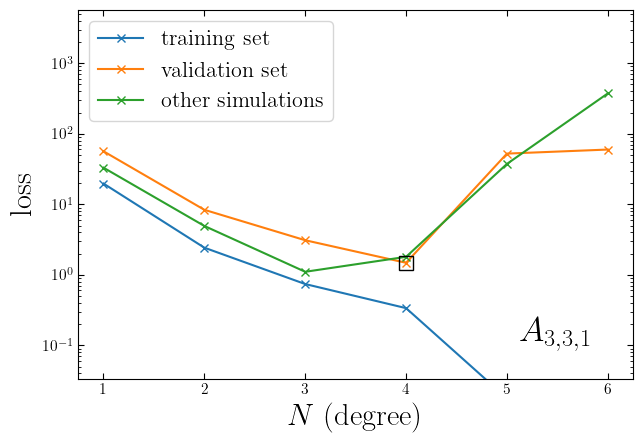

In [1181]:
fig, ax = plt.subplots(figsize = (6.5, 4.5))

plot_to = 6

ax.semilogy(degrees[:plot_to], t_loss_list_A[:plot_to], label = 'training set', marker = 'x', c = 'C0')
ax.semilogy(degrees[:plot_to], v_loss_list_A[:plot_to], label = 'validation set', marker = 'x', c = 'C1')
ax.semilogy(degrees[:plot_to], full_loss_list_A[:plot_to], label = 'other simulations', marker = 'x', c = 'C2')

ax.plot(degrees[best_indx_A], v_loss_list_A[best_indx_A],
         marker = 's', markersize = 10, markerfacecolor = 'none', 
         markeredgewidth = 1, markeredgecolor = 'k')

ax.set_ylim(t_loss_list_A[best_indx_A]*0.1, None)

ax.set_xlabel('$N$ (degree)', fontsize = 22)
ax.set_ylabel('loss', fontsize = 22)

ax.text(0.925, 0.075, f'$A_{{{mode_string_plot_tex}}}$', fontsize=25, transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='bottom')

ax.legend(fontsize = 16)

fig.tight_layout()
plt.savefig(f'../../plots/loss_vs_degree_A_{mode_string_pro}.pdf')

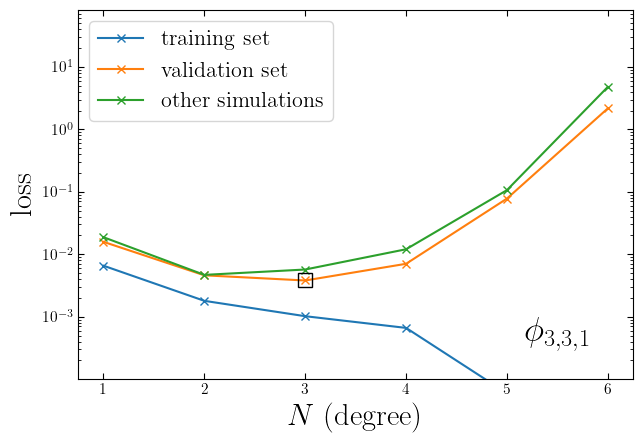

In [1182]:
fig, ax = plt.subplots(figsize = (6.5, 4.5))

plot_to = 6

ax.semilogy(degrees[:plot_to], t_loss_list_phi[:plot_to], label = 'training set', marker = 'x', c = 'C0')
ax.semilogy(degrees[:plot_to], v_loss_list_phi[:plot_to], label = 'validation set', marker = 'x', c = 'C1')
ax.semilogy(degrees[:plot_to], full_loss_list_phi[:plot_to], label = 'other simulations', marker = 'x', c = 'C2')

ax.plot(degrees[best_indx_phi], v_loss_list_phi[best_indx_phi],
         marker = 's', markersize = 10, markerfacecolor = 'none', 
         markeredgewidth = 1, markeredgecolor = 'k')

ax.set_ylim(t_loss_list_phi[best_indx_phi]*0.1, None)

ax.set_xlabel('$N$ (degree)', fontsize = 22)
ax.set_ylabel('loss', fontsize = 22)

ax.text(0.925, 0.075, f'$\phi_{{{mode_string_plot_tex}}}$', fontsize=25, transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='bottom')

ax.legend(fontsize = 16)

fig.tight_layout()
plt.savefig(f'../../plots/loss_vs_degree_phi_{mode_string_pro}.pdf')

In [1183]:
if mode_string_pro in ['2.1.0', '3.2.0', '4.4.0']:
    best_degree_A = 5
elif mode_string_pro in ['5.5.0']:
    best_degree_A = 6
# elif mode_string_pro in ['-2.2.0']:
#     best_degree_A = 5
else:
    best_degree_A = degrees[best_indx_A]

poly_A = PolynomialFeatures(degree=best_degree_A, include_bias=True)
poly_features_A = poly_A.fit_transform(X_A)
poly_features_full_A = poly_A.fit_transform(X_full_A)
X_t_A,X_v_A, y_t_A, y_v_A, w_t_A, w_v_A = train_test_split(poly_features_A,y_A,w_A,train_size=0.8,test_size=0.2,random_state=random_state)

length = X_t_A.shape[1]
X_t_copy = X_t_A.copy()
X_v_copy = X_v_A.copy()
X_full_copy = poly_features_full_A.copy()
del_indx_list_A = []
del_loss_list_A = [t_loss_list_A[best_indx_A]]
del_v_loss_list_A = [v_loss_list_A[best_indx_A]]
del_extra_v_loss_list_A = [full_loss_list_A[best_indx_A]]
for j in range(len(X_t_A[0])-1):
    del_indx = 1
    best_loss = np.inf
    for i in range(len(X_t_copy[0])):
        if i == 0:
            continue
        X_t_del = np.delete(X_t_copy, i, 1)
        X_v_del = np.delete(X_v_copy, i, 1)
        X_full_dell = np.delete(X_full_copy, i, 1)
        poly_reg_model_del = LinearRegression(fit_intercept = False)
        poly_reg_model_del.fit(X_t_del, y_t_A, sample_weight=w_t_A)
        loss = mse(y_t_A, poly_reg_model_del.predict(X_t_del), sample_weight=w_t_A)
        v_loss = mse(y_v_A, poly_reg_model_del.predict(X_v_del), sample_weight=w_v_A)
        extra_v_loss = mse(y_full_A, poly_reg_model_del.predict(X_full_dell), sample_weight=w_full_A)
        if loss < best_loss:
            best_loss = loss
            del_indx = i
    X_t_copy = np.delete(X_t_copy, del_indx, 1)
    X_v_copy = np.delete(X_v_copy, del_indx, 1)
    X_full_copy = np.delete(X_full_copy, del_indx, 1)
    del_indx_list_A.append(del_indx)
    del_loss_list_A.append(best_loss)
    del_v_loss_list_A.append(v_loss)
    del_extra_v_loss_list_A.append(extra_v_loss)

loss_list_order_A = del_loss_list_A[::-1]
v_loss_list_order_A = del_v_loss_list_A[::-1]
extra_v_loss_list_order_A = del_extra_v_loss_list_A[::-1]

In [1184]:
x_points_A = (np.array(range(len(X_t_A[0]))) + 1)
v_loss_min_A = np.min(v_loss_list_order_A[:20])
best_term_indx_A = np.argmax(v_loss_list_order_A < v_loss_min_A*1.5)
best_term_num_A = x_points_A[best_term_indx_A]

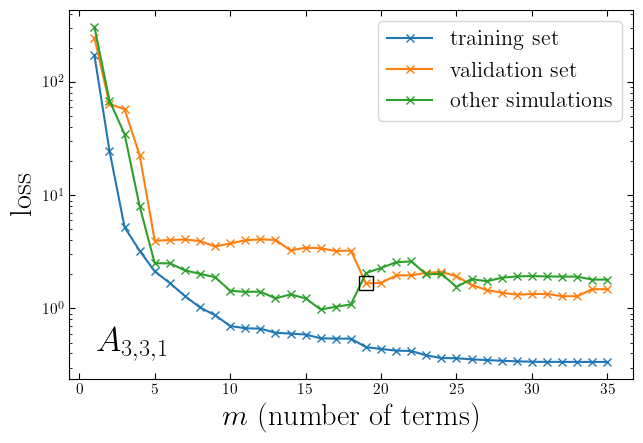

In [1185]:
fig, ax = plt.subplots(figsize = (6.5, 4.5))

ax.semilogy(x_points_A, loss_list_order_A, label='training set', marker = 'x')
ax.semilogy(x_points_A, v_loss_list_order_A, label='validation set', marker = 'x')
ax.semilogy(x_points_A, extra_v_loss_list_order_A, label='other simulations', marker = 'x')
ax.plot(best_term_num_A, v_loss_list_order_A[best_term_indx_A], marker = 's', markersize = 10, markerfacecolor = 'none',
            markeredgewidth = 1, markeredgecolor = 'k')

ax.legend(fontsize = 16)
ax.set_xlabel('$m$ (number of terms)', fontsize = 22)
ax.set_ylabel('loss', fontsize = 22)

ax.text(0.05, 0.075, f'$A_{{{mode_string_plot_tex}}}$', fontsize=25, transform=ax.transAxes)

fig.tight_layout()
plt.savefig(f'../../plots/loss_vs_n_terms_A_{mode_string_pro}.pdf')

In [1186]:
if mode_string_pro in ['4.4.0', '5.5.0']:
    best_degree_phi = 6
else:
    best_degree_phi = degrees[best_indx_phi]

poly_phi = PolynomialFeatures(degree=best_degree_phi, include_bias=True)
poly_features_phi = poly_phi.fit_transform(X_phi)
poly_features_full_phi = poly_phi.fit_transform(X_full_phi)
X_t_phi,X_v_phi, y_t_phi, y_v_phi, w_t_phi, w_v_phi = train_test_split(poly_features_phi,y_phi,w_phi,train_size=0.8,test_size=0.2,random_state=random_state)

length = X_t_phi.shape[1]
X_t_copy = X_t_phi.copy()
X_v_copy = X_v_phi.copy()
X_full_copy = poly_features_full_phi.copy()
del_indx_list_phi = []
del_loss_list_phi = [t_loss_list_phi[best_indx_phi]]
del_v_loss_list_phi = [v_loss_list_phi[best_indx_phi]]
del_extra_v_loss_list_phi = [full_loss_list_phi[best_indx_phi]]
for j in range(len(X_t_phi[0])-1):
    del_indx = 1
    best_loss = np.inf
    for i in range(len(X_t_copy[0])):
        if i == 0:
            continue
        X_t_del = np.delete(X_t_copy, i, 1)
        X_v_del = np.delete(X_v_copy, i, 1)
        X_full_dell = np.delete(X_full_copy, i, 1)
        poly_reg_model_del = LinearRegression(fit_intercept = False)
        poly_reg_model_del.fit(X_t_del, y_t_phi, sample_weight=w_t_phi)
        loss = mse(y_t_phi, poly_reg_model_del.predict(X_t_del), sample_weight=w_t_phi)
        v_loss = mse(y_v_phi, poly_reg_model_del.predict(X_v_del), sample_weight=w_v_phi)
        extra_v_loss = mse(y_full_phi, poly_reg_model_del.predict(X_full_dell), sample_weight=w_full_phi)
        if loss < best_loss:
            best_loss = loss
            del_indx = i
    X_t_copy = np.delete(X_t_copy, del_indx, 1)
    X_v_copy = np.delete(X_v_copy, del_indx, 1)
    X_full_copy = np.delete(X_full_copy, del_indx, 1)
    del_indx_list_phi.append(del_indx)
    del_loss_list_phi.append(best_loss)
    del_v_loss_list_phi.append(v_loss)
    del_extra_v_loss_list_phi.append(extra_v_loss)

loss_list_order_phi = del_loss_list_phi[::-1]
v_loss_list_order_phi = del_v_loss_list_phi[::-1]
extra_v_loss_list_order_phi = del_extra_v_loss_list_phi[::-1]

In [1187]:
x_points_phi = (np.array(range(len(X_t_phi[0]))) + 1)
v_loss_min_phi = np.min(v_loss_list_order_phi[:20])
best_term_indx_phi = np.argmax(v_loss_list_order_phi < v_loss_min_phi*1.5)
best_term_num_phi = x_points_phi[best_term_indx_phi]

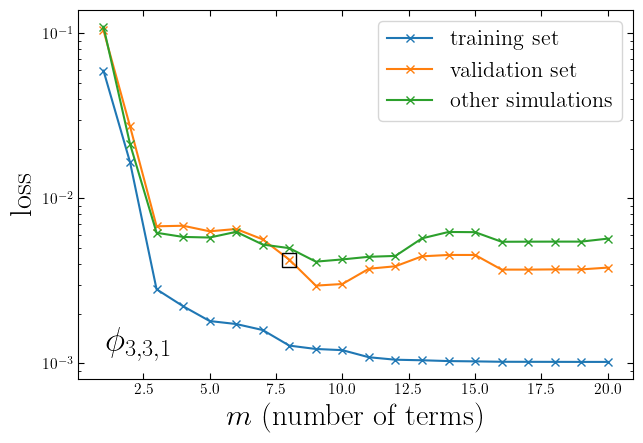

In [1188]:
fig, ax = plt.subplots(figsize = (6.5, 4.5))

ax.semilogy(x_points_phi, loss_list_order_phi, label='training set', marker = 'x')
ax.semilogy(x_points_phi, v_loss_list_order_phi, label='validation set', marker = 'x')
ax.semilogy(x_points_phi, extra_v_loss_list_order_phi, label='other simulations', marker = 'x')
ax.plot(best_term_num_phi, v_loss_list_order_phi[best_term_indx_phi], marker = 's', markersize = 10, markerfacecolor = 'none',
            markeredgewidth = 1, markeredgecolor = 'k')

ax.legend(fontsize = 16)
ax.set_xlabel('$m$ (number of terms)', fontsize = 22)
ax.set_ylabel('loss', fontsize = 22)

ax.text(0.05, 0.075, f'$\phi_{{{mode_string_plot_tex}}}$', fontsize=25, transform=ax.transAxes)

fig.tight_layout()
plt.savefig(f'../../plots/loss_vs_n_terms_phi_{mode_string_pro}.pdf')

In [1189]:
indx_list_A = list(range(len(poly_features_A[0])))
original_indx_del_list_A = []
for indx in del_indx_list_A:
    original_indx_del_list_A.append(indx_list_A[indx])
    del indx_list_A[indx]
original_indx_del_list_A.append(indx_list_A[0])
original_indx_order_A = original_indx_del_list_A[::-1]
include_terms_A = original_indx_order_A[:best_term_num_A]
include_terms_sorted_A = np.sort(include_terms_A)
X_t_red_A = X_t_A[:,include_terms_sorted_A]
X_v_red_A = X_v_A[:,include_terms_sorted_A]
poly_red_A = LinearRegression()
poly_red_A.fit(X_t_red_A, y_t_A, sample_weight=w_t_A)

LinearRegression()

In [1190]:
indx_list_phi = list(range(len(poly_features_phi[0])))
original_indx_del_list_phi = []
for indx in del_indx_list_phi:
    original_indx_del_list_phi.append(indx_list_phi[indx])
    del indx_list_phi[indx]
original_indx_del_list_phi.append(indx_list_phi[0])
original_indx_order_phi = original_indx_del_list_phi[::-1]
include_terms_phi = original_indx_order_phi[:best_term_num_phi]
include_terms_sorted_phi = np.sort(include_terms_phi)
X_t_red_phi = X_t_phi[:,include_terms_sorted_phi]
X_v_red_phi = X_v_phi[:,include_terms_sorted_phi]
poly_red_phi = LinearRegression()
poly_red_phi.fit(X_t_red_phi, y_t_phi, sample_weight=w_t_phi)

LinearRegression()

In [1191]:
def to_sigfig(num, sigfig = 4):
    return np.format_float_positional(num, precision=sigfig, fractional = False, trim = '-')

In [1192]:
def poly_expression_latex(powers, poly_red, variables = ['\eta', '\chi_+', '\chi_-'], sigfig = 4, real = False):
    save_array = []
    complex_intercept = poly_red.intercept_
    save_array.append([0, 0, 0, poly_red.intercept_])
    intercept_A = np.abs(complex_intercept)
    intercept_phi = np.angle(complex_intercept)
    if intercept_phi < 0:
        intercept_phi += 2*np.pi
    if real:
        if 3*np.pi/2 > intercept_phi > np.pi/2:
            expression = f'- {to_sigfig(intercept_A, sigfig = sigfig)}'
        else:
            expression = f'{to_sigfig(intercept_A, sigfig = sigfig)}'
    else:
        expression = f'{to_sigfig(intercept_A, sigfig = sigfig)} e^{{i {to_sigfig(intercept_phi, sigfig = sigfig)}}}'
    for p, power in enumerate(powers):
        if np.all(power == 0):
            continue
        complex_coeff = poly_red.coef_[p]
        save_array.append([power[0], power[1], power[2], poly_red.coef_[p]])
        coeff_A = np.abs(complex_coeff)
        coeff_phi = np.angle(complex_coeff)
        if coeff_phi < 0:
            coeff_phi += 2*np.pi
        if real:
            if 3*np.pi/2 > coeff_phi > np.pi/2:
                coef_expression = f' - {to_sigfig(coeff_A, sigfig = sigfig)}'
            else:
                coef_expression = f' + {to_sigfig(coeff_A, sigfig = sigfig)}'
        else:
            coef_expression = f' + {to_sigfig(coeff_A, sigfig = sigfig)} e^{{i {to_sigfig(coeff_phi, sigfig = sigfig)}}}'
        expression += coef_expression
        for i in range(len(power)):
            if power[i] == 0:
                continue
            if power[i] == 1:
                expression += f' {variables[i]}'
            else:
                expression += f' {variables[i]}^{power[i]}'
    save_array = np.array(save_array)
    return expression, save_array

In [1193]:
from IPython.display import display, Math

In [1194]:
tex_expression_A, save_array_A = poly_expression_latex(poly_A.powers_[include_terms_sorted_A], poly_red_A, real = True)
display(Math(tex_expression_A))

<IPython.core.display.Math object>

In [1195]:
tex_expression_phi, save_array_phi = poly_expression_latex(poly_phi.powers_[include_terms_sorted_phi], poly_red_phi, real = True)
display(Math(tex_expression_phi))

<IPython.core.display.Math object>

In [1196]:
with open(f'./fit_expressions/hyperfit_tex_A_{mode_string_pro}.txt', 'w') as f:
    f.write(tex_expression_A)

np.savetxt(f'./fit_expressions/hyperfit_array_A_{mode_string_pro}.csv', save_array_A)

with open(f'./fit_expressions/hyperfit_tex_phi_{mode_string_pro}.txt', 'w') as f:
    f.write(tex_expression_phi)

np.savetxt(f'./fit_expressions/hyperfit_array_phi_{mode_string_pro}.csv', save_array_phi)

In [1197]:
# y_pred = models[best_indx].predict(poly_features_list[best_indx])
A_pred = poly_red_A.predict(poly_features_A[:, include_terms_sorted_A])
A_pred_full = poly_red_A.predict(poly_features_full_A[:, include_terms_sorted_A])
phi_pred = poly_red_phi.predict(poly_features_phi[:, include_terms_sorted_phi])
phi_pred_full = poly_red_phi.predict(poly_features_full_phi[:, include_terms_sorted_phi])

In [1198]:
df_mode_3D['A_pred'] = A_pred*PN_func(df_mode_3D['eta'])
df_mode_3D['A_pred_err'] = np.abs(df_mode_3D['A_pred'] - df_mode_3D['A_med'])
df_mode_3D['A_pred_rel_err'] = np.abs(df_mode_3D['A_pred_err']/df_mode_3D['A_med'])
df_mode_3D['phi_pred'] = phi_pred
df_mode_3D['phi_pred_err'] = np.abs(df_mode_3D['phi_pred'] - df_mode_3D['phase_unwrapped'])
df_mode_3D['phi_pred_rel_err'] = np.abs(df_mode_3D['phi_pred_err']/df_mode_3D['phase_unwrapped'])

In [1199]:
df_mode_3D_full['A_pred'] = A_pred_full*PN_func(df_mode_3D_full['eta'])
df_mode_3D_full['A_pred_err'] = np.abs(df_mode_3D_full['A_pred'] - df_mode_3D_full['A_med'])
df_mode_3D_full['A_pred_rel_err'] = np.abs(df_mode_3D_full['A_pred_err']/df_mode_3D_full['A_med'])
df_mode_3D_full['phi_pred'] = phi_pred_full
df_mode_3D_full['phi_pred_err'] = np.abs(df_mode_3D_full['phi_pred'] - df_mode_3D_full['phase_unwrapped'])
df_mode_3D_full['phi_pred_rel_err'] = np.abs(df_mode_3D_full['phi_pred_err']/df_mode_3D_full['phase_unwrapped'])

In [1200]:
df_mode_3D_copy_A = df_mode_3D.copy()
df_mode_3D_copy_A.sort_values('A_med', ascending = True, inplace = True)
df_mode_3D_copy_phi = df_mode_3D.copy()
df_mode_3D_copy_phi.sort_values('phase_unwrapped', ascending = True, inplace = True)

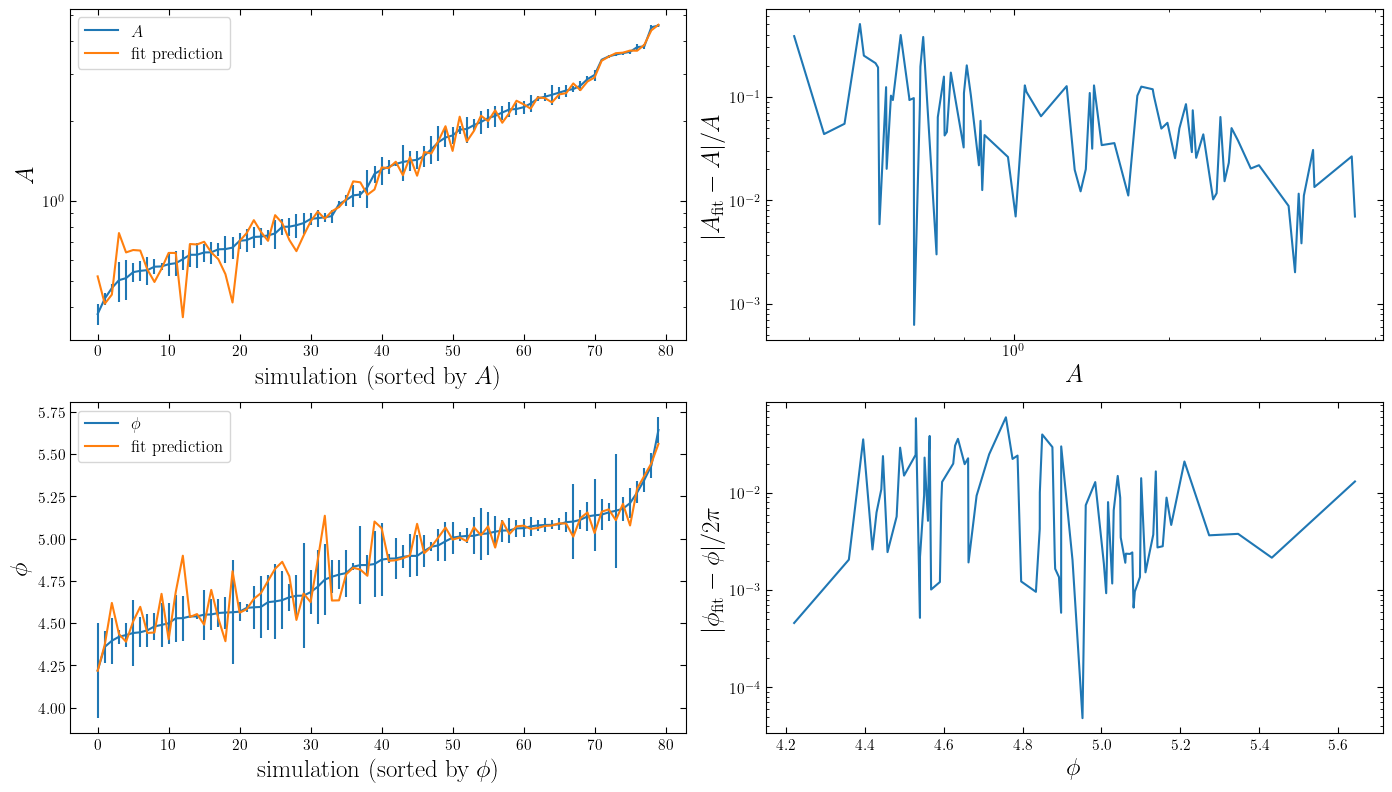

In [1201]:
fig, axss = plt.subplots(2, 2, figsize = (14, 8))

axs = axss[0]

axs[0].semilogy(df_mode_3D_copy_A['A_med'].to_numpy(), label = r'$A$')
axs[0].errorbar(range(len(df_mode_3D_copy_A)), df_mode_3D_copy_A['A_med'].to_numpy(), 
             yerr = df_mode_3D_copy_A['A_med'].to_numpy()*df_mode_3D_copy_A['A_range'].to_numpy(), fmt = 'none',
             )
axs[0].semilogy(df_mode_3D_copy_A['A_pred'].to_numpy(), label = r'fit prediction')
axs[0].set_xlabel(r'simulation (sorted by $A$)')
axs[0].set_ylabel(r'$A$')
axs[0].legend()

axs[1].loglog(df_mode_3D_copy_A['A_med'].to_numpy(), np.abs(df_mode_3D_copy_A['A_med'].to_numpy() - df_mode_3D_copy_A['A_pred'].to_numpy())/df_mode_3D_copy_A['A_med'].to_numpy())
axs[1].set_xlabel(r'$A$')
axs[1].set_ylabel(r'$|A_{\rm fit} - A|/A$')

axs = axss[1]

axs[0].plot(df_mode_3D_copy_phi['phase_unwrapped'].to_numpy(), label = r'$\phi$')
axs[0].errorbar(range(len(df_mode_3D_copy_phi)), df_mode_3D_copy_phi['phase_unwrapped'].to_numpy(), 
             yerr = df_mode_3D_copy_phi['phi_range'].to_numpy(), fmt = 'none',
             )
axs[0].plot(df_mode_3D_copy_phi['phi_pred'].to_numpy(), label = r'fit prediction')
axs[0].set_xlabel(r'simulation (sorted by $\phi$)')
axs[0].set_ylabel(r'$\phi$')
axs[0].legend()

axs[1].semilogy(df_mode_3D_copy_phi['phase_unwrapped'].to_numpy(), np.abs(df_mode_3D_copy_phi['phase_unwrapped'].to_numpy() - df_mode_3D_copy_phi['phi_pred'].to_numpy())/(2*np.pi))
axs[1].set_xlabel(r'$\phi$')
axs[1].set_ylabel(r'$|\phi_{\rm fit} - \phi|/2\pi$')



fig.tight_layout()
plt.savefig(f'../../plots/fit_err_{mode_string_pro}.pdf')
plt.savefig(f'../../plots/fit_err_{mode_string_pro}.png', dpi = 300, bbox_inches = 'tight', transparent = False, facecolor='white')

In [1102]:
# fig, axs = plt.subplots(1, 2, figsize = (14, 4))

# axs[0].semilogy(df_mode_3D_copy_A['A_med'].to_numpy(), label = r'$A$')
# axs[0].errorbar(range(len(df_mode_3D_copy_A)), df_mode_3D_copy_A['A_med'].to_numpy(), 
#              yerr = df_mode_3D_copy_A['A_med'].to_numpy()*df_mode_3D_copy_A['A_range'].to_numpy(), fmt = 'none',
#              )
# axs[0].semilogy(df_mode_3D_copy_A['A_pred'].to_numpy(), label = r'fit prediction')
# axs[0].set_xlabel(r'simulation (sorted by $A$)')
# axs[0].set_ylabel(r'$A$')
# axs[0].legend()

# axs[1].loglog(df_mode_3D_copy_A['A_med'].to_numpy(), np.abs(df_mode_3D_copy_A['A_med'].to_numpy() - df_mode_3D_copy_A['A_pred'].to_numpy())/df_mode_3D_copy_A['A_med'].to_numpy())
# axs[1].set_xlabel(r'$A$')
# axs[1].set_ylabel(r'$|A_{\rm fit} - A|/A$')


# fig.tight_layout()
# plt.savefig(f'../../plots/fit_err_{mode_string_pro}.pdf')
# plt.savefig(f'../../plots/fit_err_{mode_string_pro}.png', dpi = 300, bbox_inches = 'tight', transparent = False, facecolor='white')